In [2]:
# 1.1 Loading and Visualizing Data Please Note this data is clean for analysis.
import pandas as pd
data = pd.read_csv(r"C:\Users\Apelu\OneDrive\Desktop\2225757_Code Snips\Modelling\Survival_Classifier\original_datasetCatNum.csv", low_memory=False)
data

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_._claudin.low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Lobular,...,0.7859,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,GAIN,Positive,Ductal/NST,...,-0.5294,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,-0.1457,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,...,-0.6380,-1.5275,1.1070,0.2194,1.4317,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041


In [2]:
# Display the dimensions of the data (number of rows and columns)
print("Dimensions of the data:", data.shape)


Dimensions of the data: (1904, 678)


Cross-Validation Accuracies: [0.87139108 0.83464567 0.82414698 0.88976378 0.87631579]
Cross-Validation Accuracy: 0.86
Confusion Matrix:
[[1080   23]
 [ 245  556]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1103
           1       0.96      0.69      0.81       801

    accuracy                           0.86      1904
   macro avg       0.89      0.84      0.85      1904
weighted avg       0.88      0.86      0.85      1904

AUC: 0.84


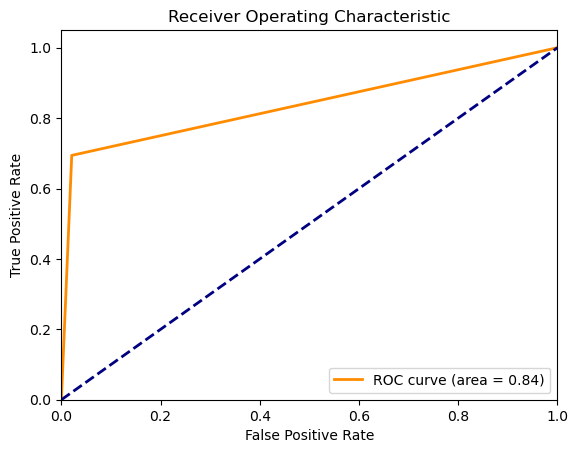

In [3]:
''' The code snip is a classification task to predict survival. The code uses a Random Forest Classifier to predict whether an individual will 
#survive or not based on the features in the dataset. The target variable, 'overall_survival', appears to be binary, indicating 
#whether a person survived (1) or not (0).'''

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt


# Splitting data into features (X) and target (y)
X = data.drop('overall_survival', axis=1)
y = data['overall_survival']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Initialize a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracies = cross_val_score(clf, X_encoded, y, cv=kf, scoring='accuracy')
print(f'Cross-Validation Accuracies: {accuracies}')

# Make predictions using cross-validation
y_pred_cv = cross_val_predict(clf, X_encoded, y, cv=kf)

# Calculate and print cross-validation accuracy
accuracy_cv = accuracy_score(y, y_pred_cv)
print(f'Cross-Validation Accuracy: {accuracy_cv:.2f}')

# Rest of the code for confusion matrix, classification report, ROC curve, and AUC score
confusion = confusion_matrix(y, y_pred_cv)
print("Confusion Matrix:")
print(confusion)

report = classification_report(y, y_pred_cv)
print("Classification Report:")
print(report)

fpr, tpr, thresholds = roc_curve(y, y_pred_cv)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Number of folds for cross-validation
k = 5

# Initialize lists to store evaluation results
accuracies = []
confusion_matrices = []
reports = []
roc_aucs = []
roc_curves = []

# Splitting data into features (X) and target (y)
X = data.drop('overall_survival', axis=1)
y = data['overall_survival']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Iterate over folds
for fold_index, (train_indices, test_indices) in enumerate(stratified_kfold.split(X_normalized, y)):
    X_train, X_test = X_normalized[train_indices], X_normalized[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Initialize an Artificial Neural Network
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),  # Adding dropout with a dropout rate of 0.5
        Dense(64, activation='relu'),
        Dropout(0.5),  # Adding dropout with a dropout rate of 0.5
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

    # Calculate and append accuracy
    accuracy = accuracy_score(y_test, y_pred_binary)
    accuracies.append(accuracy)

    # Append confusion matrix
    confusion = confusion_matrix(y_test, y_pred_binary)
    confusion_matrices.append(confusion)

    # Append classification report
    report = classification_report(y_test, y_pred_binary)
    reports.append(report)

    # Calculate ROC curve and AUC score for this fold
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(accuracies)
print(f'Cross-Validation Accuracies: {accuracies}')
print(f'Average Accuracy: {average_accuracy:.2f}')

# Print the results for the last fold
last_fold_index = len(accuracies) - 1
print(f'\nFold {last_fold_index + 1} Results:')
print("Confusion Matrix:")
print(confusion_matrices[last_fold_index])
print("Classification Report:")
print(reports[last_fold_index])
print(f"AUC: {roc_aucs[last_fold_index]:.2f}")


12/12 [==============================] - 0s 4ms/step
Cross-Validation Accuracies: [0.8110236220472441, 0.8372703412073491, 0.8346456692913385, 0.8818897637795275, 0.8184210526315789]
Average Accuracy: 0.84

Fold 5 Results:
Confusion Matrix:
[[215   5]
 [ 64  96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       220
           1       0.95      0.60      0.74       160

    accuracy                           0.82       380
   macro avg       0.86      0.79      0.80       380
weighted avg       0.85      0.82      0.81       380

AUC: 0.88


C:\Users\Apelu\anaconda3\lib\site-packages\sklearn\calibration.py:300: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Apelu\anaconda3\lib\site-packages\sklearn\calibration.py:300: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Apelu\anaconda3\lib\site-packages\sklearn\calibration.py:300: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Apelu\anaconda3\lib\site-packages\sklearn\calibration.py:300: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Apelu\anaconda3\lib\site-packages\sklearn\calibration.py:300: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


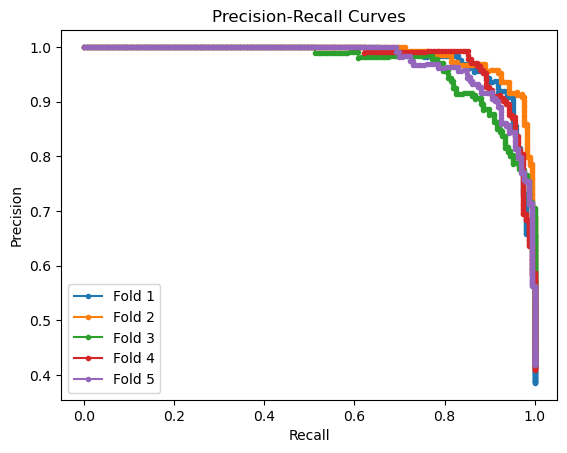

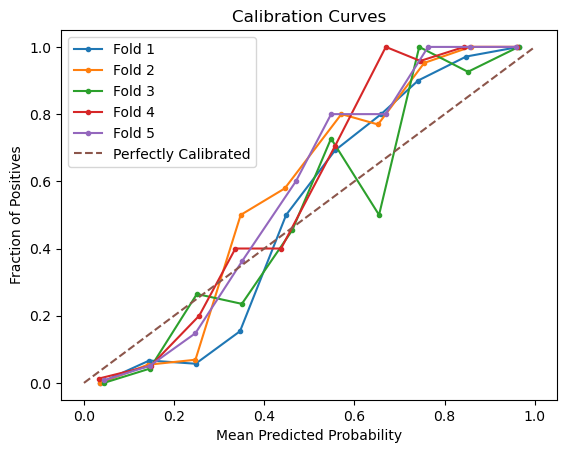

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.isotonic import IsotonicRegression
import matplotlib.pyplot as plt


# Splitting data into features (X) and target (y)
X = data.drop('overall_survival', axis=1)
y = data['overall_survival']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Initialize a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results for multiple algorithms
roc_auc_scores = []
precision_scores = []
recall_scores = []
calibration_true_prob = []
calibration_pred_prob = []

# Initialize Platt scaled classifier
platt_clf = CalibratedClassifierCV(base_estimator=RandomForestClassifier(random_state=42), method='sigmoid', cv='prefit')

# Initialize Platt scaled classifier
platt_clf = CalibratedClassifierCV(base_estimator=clf, method='sigmoid')

# Loop through folds for Platt scaling
for train_idx, test_idx in kf.split(X_encoded):
    X_train, X_test = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the classifier using Platt scaling
    platt_clf.fit(X_train, y_train)  # Instead of clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred_cv = platt_clf.predict(X_test)
    y_pred_prob = platt_clf.predict_proba(X_test)[:, 1]




    # Calculate ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc_scores.append(auc(fpr, tpr))

    # Calculate precision-recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # Calibration curve
    prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10)
    calibration_true_prob.append(prob_true)
    calibration_pred_prob.append(prob_pred)

# Plot Precision-Recall Curves
plt.figure()
for i, (precision, recall) in enumerate(zip(precision_scores, recall_scores)):
    plt.plot(recall, precision, marker='.', label=f'Fold {i+1}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

# Plot Calibration Curves
plt.figure()
for i, (true_prob, pred_prob) in enumerate(zip(calibration_true_prob, calibration_pred_prob)):
    plt.plot(pred_prob, true_prob, marker='.', label=f'Fold {i+1}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves')
plt.legend()
plt.show()


12/12 [==============================] - 0s 895us/step
Average Accuracy: 0.82


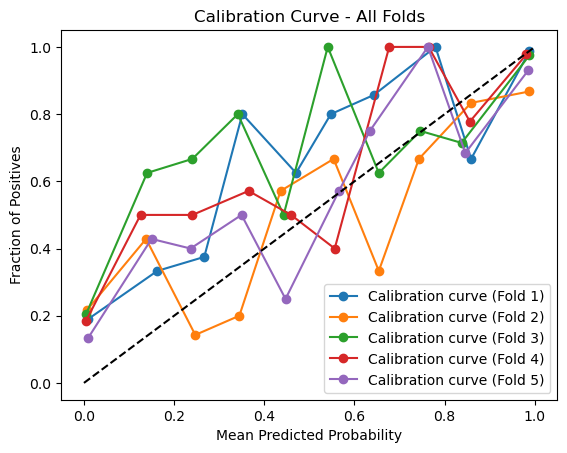

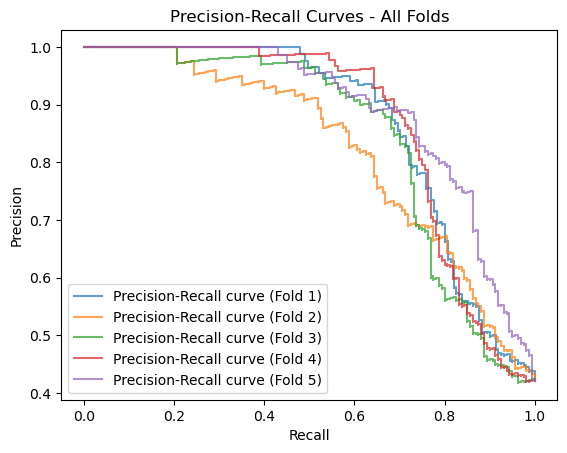

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.calibration import calibration_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler


# Number of folds for cross-validation
k = 5

# Initialize lists to store evaluation results
accuracies = []
confusion_matrices = []
reports = []
roc_aucs = []
roc_curves = []
calibration_curves = []
precision_recall_curves = []

# Splitting data into features (X) and target (y)
X = data.drop('overall_survival', axis=1)
y = data['overall_survival']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Iterate over folds
for fold_index, (train_indices, test_indices) in enumerate(stratified_kfold.split(X_normalized, y)):
    X_train, X_test = X_normalized[train_indices], X_normalized[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Initialize an Artificial Neural Network
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),  # Adding dropout with a dropout rate of 0.5
        Dense(64, activation='relu'),
        Dropout(0.5),  # Adding dropout with a dropout rate of 0.5
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

    # Calculate and append accuracy
    accuracy = accuracy_score(y_test, y_pred_binary)
    accuracies.append(accuracy)

    # Append confusion matrix
    confusion = confusion_matrix(y_test, y_pred_binary)
    confusion_matrices.append(confusion)

    # Append classification report
    report = classification_report(y_test, y_pred_binary)
    reports.append(report)

    # Calculate ROC curve and AUC score for this fold
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    # Append the ROC curve data to a list for later plotting if needed
    roc_curves.append((fpr, tpr, roc_auc))

    # Calculate and append calibration curve
    prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10, strategy='uniform')
    calibration_curves.append((prob_true, prob_pred))

    # Calculate and append precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = average_precision_score(y_test, y_pred)
    precision_recall_curves.append((precision, recall, pr_auc))

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(accuracies)
print(f'Average Accuracy: {average_accuracy:.2f}')

# Plot Calibration Curves for all folds in a single frame
plt.figure()
for fold_index, (prob_true, prob_pred) in enumerate(calibration_curves):
    plt.plot(prob_pred, prob_true, marker='o', label=f'Calibration curve (Fold {fold_index + 1})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve - All Folds')
plt.legend(loc='best')
plt.show()


# Plot Precision-Recall Curves for all folds in a single frame
plt.figure()
for fold_index, (precision, recall, pr_auc) in enumerate(precision_recall_curves):
    plt.step(recall, precision, where='post', alpha=0.7, label=f'Precision-Recall curve (Fold {fold_index + 1})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - All Folds')
plt.legend(loc='best')
plt.show()
